# Using Natural Language Processing to Generate New Recipes in Python
## Task 2: Exploratory Data Analysis and Preprocessing

In [1]:
import json
from collections import defaultdict
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import seaborn as sns



Matplotlib is building the font cache; this may take a moment.


In [2]:
data = json.load(open('Dataset/recipes_raw_nosource_ar.json', 'r'))

In [4]:
keys = list(data.keys())
data[keys[0]]


{'title': 'Slow Cooker Chicken and Dumplings',
 'ingredients': ['4 skinless, boneless chicken breast halves ADVERTISEMENT',
  '2 tablespoons butter ADVERTISEMENT',
  '2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT',
  '1 onion, finely diced ADVERTISEMENT',
  '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT',
  'ADVERTISEMENT'],
 'instructions': 'Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n',
 'picture_link': '55lznCYBbs2mT8BTx6BTkLhynGHzM.S'}

In [5]:
recipe_sources = ['ar', 'epi', 'fn']

In [6]:
df = pd.DataFrame()
sources, titles, ingredients, instructions = [], [], [], []
for recipe_source in recipe_sources:
    data = json.load(open(f'Dataset/recipes_raw_nosource_{recipe_source}.json', 'r'))
    for _, recipe in data.items():
        if ('title' in recipe) and ('ingredients' in recipe) and ('instructions' in recipe):
            sources.append(recipe_source)
            titles.append(recipe['title'])
            ingredients.append([str(ingredient).replace('ADVERTISEMENT', '') for ingredient in recipe['ingredients']])
            instructions.append(str(recipe['instructions']).replace('ADVERTISEMENT', '').replace('\n', ' '))
            
df['source'] = sources
df['title'] = titles
df['ingredients'] = ingredients
df['instructions'] = instructions

In [7]:
df.head(2)

,source,title,ingredients,instructions
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ..."
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."


In [8]:


df['ingredient_count'] = df['ingredients'].str.len().fillna(0).astype(int)
df['instruction_length'] = df['instructions'].str.split().str.len().fillna(0).astype(int)



In [9]:
df.to_pickle('df_recipes_raw.pkl')

<Axes: xlabel='source', ylabel='ingredient_count'>

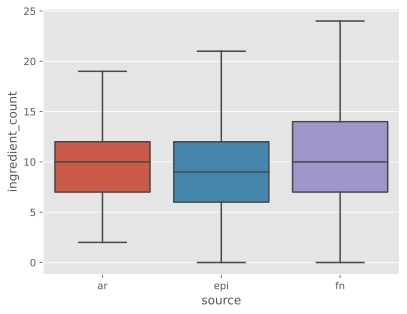

In [10]:
sns.boxplot(data=df, x='source', y='ingredient_count', showfliers=False)

<Axes: xlabel='source', ylabel='instruction_length'>

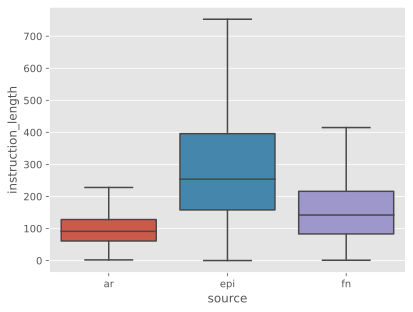

In [11]:
sns.boxplot(data=df, x='source', y='instruction_length', showfliers=False)